##De-identification in Spark OCR

####0 Import libs

In [0]:
from johnsnowlabs import nlp,medical,visual

21:06:40, INFO Received command c on object id p0
21:06:41, INFO Received command c on object id p0


In [0]:
import pkg_resources

from pyspark.ml import PipelineModel, Pipeline
from pyspark.sql import functions as F

21:14:03, INFO Received command c on object id p1


###1 Define Spark NLP de-identification pipeline

In [0]:
def deidentification_nlp_pipeline(input_column, prefix = ""):
    document_assembler = nlp.DocumentAssembler() \
        .setInputCol(input_column) \
        .setOutputCol(prefix + "document")

    # Sentence Detector annotator, processes various sentences per line
    sentence_detector = nlp.SentenceDetector() \
        .setInputCols([prefix + "document"]) \
        .setOutputCol(prefix + "sentence")

    tokenizer = nlp.Tokenizer() \
        .setInputCols([prefix + "sentence"]) \
        .setOutputCol(prefix + "token")

    # Clinical word embeddings
    word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models") \
        .setInputCols([prefix + "sentence", prefix + "token"]) \
        .setOutputCol(prefix + "embeddings")

    # NER model trained on i2b2 (sampled from MIMIC) dataset
    clinical_ner = medical.NerModel.pretrained("ner_deid_large", "en", "clinical/models") \
        .setInputCols([prefix + "sentence", prefix + "token", prefix + "embeddings"]) \
        .setOutputCol(prefix + "ner")

    custom_ner_converter = nlp.NerConverter() \
        .setInputCols([prefix + "sentence", prefix + "token", prefix + "ner"]) \
        .setOutputCol(prefix + "ner_chunk") \
        .setWhiteList(['NAME', 'AGE', 'CONTACT', 'LOCATION', 'PROFESSION', 'PERSON', 'DATE'])

    nlp_pipeline = Pipeline(stages=[
            document_assembler,
            sentence_detector,
            tokenizer,
            word_embeddings,
            clinical_ner,
            custom_ner_converter
        ])
    empty_data = spark.createDataFrame([[""]]).toDF(input_column)
    nlp_model = nlp_pipeline.fit(empty_data)
    return nlp_model

21:13:03, INFO Received command c on object id p1


###2 Define Spark OCR pipeline

In [0]:
# Read Pdf as image
pdf_to_image = visual.PdfToImage()\
  .setInputCol("content")\
  .setOutputCol("image_raw")\
  .setResolution(400)

# Extract text from image
ocr = visual.ImageToText() \
    .setInputCol("image_raw") \
    .setOutputCol("text") \
    .setIgnoreResolution(False) \
    .setPageIteratorLevel(visual.PageIteratorLevel.SYMBOL) \
    .setPageSegMode(visual.PageSegmentationMode.SPARSE_TEXT) \
    .setWithSpaces(True) \
    .setConfidenceThreshold(70)

# Found coordinates of sensitive data
position_finder = visual.PositionFinder() \
    .setInputCols("ner_chunk") \
    .setOutputCol("coordinates") \
    .setPageMatrixCol("positions") \
    .setPadding(1)

# Draw filled rectangle for hide sensitive data
drawRegions = visual.ImageDrawRegions()  \
    .setInputCol("image_raw")  \
    .setInputRegionsCol("coordinates")  \
    .setOutputCol("image_with_regions")  \
    .setFilledRect(True) \
    .setRectColor(visual.Color.black)
    
# OCR pipeline
deid_pipeline = nlp.PipelineModel(stages=[
    pdf_to_image,
    ocr,
    deidentification_nlp_pipeline(input_column="text"),
    position_finder,
    drawRegions
])

21:19:02, INFO Received command c on object id p1
21:19:02, INFO Received command c on object id p0


embeddings_clinical download started this may take some time.


21:19:03, INFO Received command c on object id p0
21:19:04, INFO Received command c on object id p0


Approximate size to download 1.6 GB
[ | ]

21:19:05, INFO Received command c on object id p0
21:19:06, INFO Received command c on object id p0


[ / ]

21:19:07, INFO Received command c on object id p0
21:19:08, INFO Received command c on object id p0
21:19:09, INFO Received command c on object id p0


[ — ]

21:19:10, INFO Received command c on object id p0
21:19:11, INFO Received command c on object id p0


[ \ ]

21:19:12, INFO Received command c on object id p0
21:19:13, INFO Received command c on object id p0
21:19:14, INFO Received command c on object id p0


[ | ]

21:19:15, INFO Received command c on object id p0
21:19:16, INFO Received command c on object id p0


[ / ]

21:19:17, INFO Received command c on object id p0
21:19:18, INFO Received command c on object id p0
21:19:19, INFO Received command c on object id p0


[ — ]

21:19:20, INFO Received command c on object id p0
21:19:21, INFO Received command c on object id p0


[ \ ]

21:19:22, INFO Received command c on object id p0
21:19:23, INFO Received command c on object id p0
21:19:24, INFO Received command c on object id p0


[ | ]

21:19:25, INFO Received command c on object id p0
21:19:26, INFO Received command c on object id p0


[ / ]

21:19:27, INFO Received command c on object id p0
21:19:28, INFO Received command c on object id p0
21:19:29, INFO Received command c on object id p0


[ — ]

21:19:30, INFO Received command c on object id p0
21:19:31, INFO Received command c on object id p0


[ \ ]

21:19:32, INFO Received command c on object id p0
21:19:33, INFO Received command c on object id p0
21:19:34, INFO Received command c on object id p0


[ | ]

21:19:35, INFO Received command c on object id p0
21:19:36, INFO Received command c on object id p0


[ / ]

21:19:37, INFO Received command c on object id p0
21:19:38, INFO Received command c on object id p0
21:19:39, INFO Received command c on object id p0


[ — ]

21:19:40, INFO Received command c on object id p0
21:19:41, INFO Received command c on object id p0


[ \ ]

21:19:42, INFO Received command c on object id p0
21:19:43, INFO Received command c on object id p0
21:19:44, INFO Received command c on object id p0


[ | ]

21:19:45, INFO Received command c on object id p0
21:19:46, INFO Received command c on object id p0


[ / ]

21:19:47, INFO Received command c on object id p0
21:19:48, INFO Received command c on object id p0
21:19:49, INFO Received command c on object id p0


[ — ]

21:19:50, INFO Received command c on object id p0
21:19:51, INFO Received command c on object id p0


[ \ ]

21:19:52, INFO Received command c on object id p0
21:19:53, INFO Received command c on object id p0
21:19:54, INFO Received command c on object id p0


[ | ]

21:19:55, INFO Received command c on object id p0
21:19:56, INFO Received command c on object id p0


[ / ]

21:19:57, INFO Received command c on object id p0
21:19:58, INFO Received command c on object id p0
21:19:59, INFO Received command c on object id p0


[ — ]

21:20:00, INFO Received command c on object id p0
21:20:01, INFO Received command c on object id p0


[ \ ]

21:20:02, INFO Received command c on object id p0
21:20:03, INFO Received command c on object id p0
21:20:04, INFO Received command c on object id p0


[ | ]

21:20:05, INFO Received command c on object id p0
21:20:06, INFO Received command c on object id p0


[ / ]

21:20:07, INFO Received command c on object id p0
21:20:08, INFO Received command c on object id p0
21:20:09, INFO Received command c on object id p0


[ — ]

21:20:10, INFO Received command c on object id p0
21:20:11, INFO Received command c on object id p0


[ \ ]

21:20:12, INFO Received command c on object id p0
21:20:13, INFO Received command c on object id p0
21:20:14, INFO Received command c on object id p0


[ | ]

21:20:15, INFO Received command c on object id p0
21:20:16, INFO Received command c on object id p0


[ / ]

21:20:17, INFO Received command c on object id p0
21:20:18, INFO Received command c on object id p0
21:20:19, INFO Received command c on object id p0


[ — ]

21:20:20, INFO Received command c on object id p0
21:20:21, INFO Received command c on object id p0


[ \ ]

21:20:22, INFO Received command c on object id p0
21:20:23, INFO Received command c on object id p0
21:20:24, INFO Received command c on object id p0


[ | ]

21:20:25, INFO Received command c on object id p0
21:20:26, INFO Received command c on object id p0


[ / ]

21:20:27, INFO Received command c on object id p0
21:20:28, INFO Received command c on object id p0
21:20:29, INFO Received command c on object id p0


[ — ]

21:20:30, INFO Received command c on object id p0
21:20:31, INFO Received command c on object id p0


[ \ ]

21:20:32, INFO Received command c on object id p0
21:20:33, INFO Received command c on object id p0
21:20:34, INFO Received command c on object id p0


[ | ]

21:20:35, INFO Received command c on object id p0
21:20:36, INFO Received command c on object id p0


[ / ]

21:20:37, INFO Received command c on object id p0
21:20:38, INFO Received command c on object id p0
21:20:39, INFO Received command c on object id p0


[ — ]

21:20:40, INFO Received command c on object id p0
21:20:41, INFO Received command c on object id p0


[ \ ]

21:20:42, INFO Received command c on object id p0
21:20:43, INFO Received command c on object id p0
21:20:44, INFO Received command c on object id p0


[ | ]

21:20:45, INFO Received command c on object id p0
21:20:46, INFO Received command c on object id p0


[ / ]

21:20:47, INFO Received command c on object id p0
21:20:48, INFO Received command c on object id p0
21:20:49, INFO Received command c on object id p0


[ — ]

21:20:50, INFO Received command c on object id p0
21:20:51, INFO Received command c on object id p0


[ \ ]

21:20:52, INFO Received command c on object id p0
21:20:53, INFO Received command c on object id p0
21:20:54, INFO Received command c on object id p0


[ | ]

21:20:55, INFO Received command c on object id p0
21:20:56, INFO Received command c on object id p0


[ / ]

21:20:57, INFO Received command c on object id p0
21:20:58, INFO Received command c on object id p0
21:20:59, INFO Received command c on object id p0


[ — ]

21:21:00, INFO Received command c on object id p0
21:21:01, INFO Received command c on object id p0


[ \ ]

21:21:02, INFO Received command c on object id p0
21:21:03, INFO Received command c on object id p0
21:21:04, INFO Received command c on object id p0


[ | ]

21:21:05, INFO Received command c on object id p0
21:21:06, INFO Received command c on object id p0


[ / ]

21:21:07, INFO Received command c on object id p0
21:21:08, INFO Received command c on object id p0
21:21:09, INFO Received command c on object id p0


[ — ]

21:21:10, INFO Received command c on object id p0
21:21:11, INFO Received command c on object id p0


[ \ ]

21:21:12, INFO Received command c on object id p0
21:21:13, INFO Received command c on object id p0
21:21:14, INFO Received command c on object id p0


[ | ]

21:21:15, INFO Received command c on object id p0
21:21:16, INFO Received command c on object id p0


[ / ]

21:21:17, INFO Received command c on object id p0
21:21:18, INFO Received command c on object id p0
21:21:19, INFO Received command c on object id p0


[ — ]

21:21:20, INFO Received command c on object id p0
21:21:21, INFO Received command c on object id p0


[ \ ]

21:21:22, INFO Received command c on object id p0
21:21:23, INFO Received command c on object id p0
21:21:24, INFO Received command c on object id p0


[OK!]
ner_deid_large download started this may take some time.
[ | ]

21:21:25, INFO Received command c on object id p0
21:21:26, INFO Received command c on object id p0


[ / ]

21:21:27, INFO Received command c on object id p0
21:21:28, INFO Received command c on object id p0
21:21:29, INFO Received command c on object id p0


[ — ]

21:21:30, INFO Received command c on object id p0
21:21:31, INFO Received command c on object id p0


[ \ ]

21:21:32, INFO Received command c on object id p0
21:21:33, INFO Received command c on object id p0
21:21:34, INFO Received command c on object id p0


[ | ]

21:21:35, INFO Received command c on object id p0
21:21:36, INFO Received command c on object id p0


[ / ]

21:21:37, INFO Received command c on object id p0
21:21:38, INFO Received command c on object id p0
21:21:39, INFO Received command c on object id p0


[ — ]

21:21:40, INFO Received command c on object id p0
21:21:41, INFO Received command c on object id p0


[ \ ]

21:21:42, INFO Received command c on object id p0
21:21:43, INFO Received command c on object id p0
21:21:44, INFO Received command c on object id p0


[ | ]

21:21:45, INFO Received command c on object id p0
21:21:46, INFO Received command c on object id p0


[ / ]

21:21:47, INFO Received command c on object id p0
21:21:48, INFO Received command c on object id p0
21:21:49, INFO Received command c on object id p0


[ — ]

21:21:50, INFO Received command c on object id p0
21:21:51, INFO Received command c on object id p0


[ \ ]

21:21:52, INFO Received command c on object id p0
21:21:53, INFO Received command c on object id p0
21:21:54, INFO Received command c on object id p0


[ | ]

21:21:55, INFO Received command c on object id p0
21:21:56, INFO Received command c on object id p0


[ / ]

21:21:57, INFO Received command c on object id p0
21:21:58, INFO Received command c on object id p0
21:21:59, INFO Received command c on object id p0


[ — ]

21:22:00, INFO Received command c on object id p0
21:22:01, INFO Received command c on object id p0


[ \ ]

21:22:02, INFO Received command c on object id p0
21:22:03, INFO Received command c on object id p0
21:22:04, INFO Received command c on object id p0


[ | ]

21:22:05, INFO Received command c on object id p0
21:22:06, INFO Received command c on object id p0


[ / ]

21:22:07, INFO Received command c on object id p0
21:22:08, INFO Received command c on object id p0
21:22:09, INFO Received command c on object id p0


[ — ]

21:22:10, INFO Received command c on object id p0
21:22:11, INFO Received command c on object id p0


[ \ ]

21:22:12, INFO Received command c on object id p0
21:22:13, INFO Received command c on object id p0
21:22:14, INFO Received command c on object id p0


[ | ]

21:22:15, INFO Received command c on object id p0
21:22:16, INFO Received command c on object id p0


[ / ]

21:22:17, INFO Received command c on object id p0
21:22:18, INFO Received command c on object id p0
21:22:19, INFO Received command c on object id p0


[ — ]

21:22:20, INFO Received command c on object id p0
21:22:21, INFO Received command c on object id p0


[ \ ]

21:22:22, INFO Received command c on object id p0
21:22:23, INFO Received command c on object id p0
21:22:24, INFO Received command c on object id p0


[ | ]

21:22:25, INFO Received command c on object id p0
21:22:26, INFO Received command c on object id p0


[ / ]

21:22:27, INFO Received command c on object id p0
21:22:28, INFO Received command c on object id p0
21:22:29, INFO Received command c on object id p0


[ — ]

21:22:30, INFO Received command c on object id p0
21:22:31, INFO Received command c on object id p0


[ \ ]

21:22:32, INFO Received command c on object id p0
21:22:33, INFO Received command c on object id p0
21:22:34, INFO Received command c on object id p0


[ | ]

21:22:35, INFO Received command c on object id p0
21:22:36, INFO Received command c on object id p0


[ / ]

21:22:37, INFO Received command c on object id p0
21:22:38, INFO Received command c on object id p0
21:22:39, INFO Received command c on object id p0


[ — ]

21:22:40, INFO Received command c on object id p0
21:22:41, INFO Received command c on object id p0


[ \ ]

21:22:42, INFO Received command c on object id p0
21:22:43, INFO Received command c on object id p0
21:22:44, INFO Received command c on object id p0


[ | ]

21:22:45, INFO Received command c on object id p0
21:22:46, INFO Received command c on object id p0


[ / ]

21:22:47, INFO Received command c on object id p0
21:22:48, INFO Received command c on object id p0
21:22:49, INFO Received command c on object id p0


[ — ]

21:22:50, INFO Received command c on object id p0
21:22:51, INFO Received command c on object id p0


[ \ ]

21:22:52, INFO Received command c on object id p0
21:22:53, INFO Received command c on object id p0
21:22:54, INFO Received command c on object id p0


[ | ]

21:22:55, INFO Received command c on object id p0
21:22:56, INFO Received command c on object id p0


[ / ]

21:22:58, INFO Received command c on object id p0
21:22:58, INFO Received command c on object id p0
21:22:59, INFO Received command c on object id p0


[ — ]

21:23:00, INFO Received command c on object id p0
21:23:01, INFO Received command c on object id p0


[ \ ]

21:23:02, INFO Received command c on object id p0
21:23:03, INFO Received command c on object id p0
21:23:04, INFO Received command c on object id p0


[ | ]

21:23:05, INFO Received command c on object id p0
21:23:06, INFO Received command c on object id p0


[ / ]

21:23:07, INFO Received command c on object id p0
21:23:08, INFO Received command c on object id p0
21:23:09, INFO Received command c on object id p0


[ — ]

21:23:10, INFO Received command c on object id p0
21:23:11, INFO Received command c on object id p0


[ \ ]

21:23:12, INFO Received command c on object id p0
21:23:13, INFO Received command c on object id p0
21:23:14, INFO Received command c on object id p0


[ | ]

21:23:15, INFO Received command c on object id p0
21:23:16, INFO Received command c on object id p0


[ / ]

21:23:17, INFO Received command c on object id p0
21:23:18, INFO Received command c on object id p0
21:23:19, INFO Received command c on object id p0


[ — ]

21:23:20, INFO Received command c on object id p0
21:23:21, INFO Received command c on object id p0


[ \ ]

21:23:22, INFO Received command c on object id p0
21:23:23, INFO Received command c on object id p0
21:23:24, INFO Received command c on object id p0


[ | ]

21:23:25, INFO Received command c on object id p0
21:23:26, INFO Received command c on object id p0


[ / ]

21:23:27, INFO Received command c on object id p0
21:23:28, INFO Received command c on object id p0
21:23:29, INFO Received command c on object id p0


[ — ]

21:23:30, INFO Received command c on object id p0
21:23:31, INFO Received command c on object id p0


[ \ ]

21:23:32, INFO Received command c on object id p0
21:23:33, INFO Received command c on object id p0
21:23:34, INFO Received command c on object id p0


[ | ]

21:23:35, INFO Received command c on object id p0
21:23:36, INFO Received command c on object id p0


[ / ]

21:23:37, INFO Received command c on object id p0
21:23:38, INFO Received command c on object id p0
21:23:39, INFO Received command c on object id p0


[ — ]

21:23:40, INFO Received command c on object id p0
21:23:41, INFO Received command c on object id p0


[ \ ]

21:23:42, INFO Received command c on object id p0
21:23:43, INFO Received command c on object id p0
21:23:44, INFO Received command c on object id p0


[ | ]

21:23:45, INFO Received command c on object id p0
21:23:46, INFO Received command c on object id p0


[ / ]

21:23:47, INFO Received command c on object id p0
21:23:48, INFO Received command c on object id p0
21:23:49, INFO Received command c on object id p0


[ — ]

21:23:50, INFO Received command c on object id p0
21:23:51, INFO Received command c on object id p0


[ \ ]

21:23:52, INFO Received command c on object id p0
21:23:53, INFO Received command c on object id p0
21:23:54, INFO Received command c on object id p0


[ | ]

21:23:55, INFO Received command c on object id p0
21:23:56, INFO Received command c on object id p0


[ / ]

21:23:57, INFO Received command c on object id p0
21:23:58, INFO Received command c on object id p0
21:23:59, INFO Received command c on object id p0


[ — ]

21:24:00, INFO Received command c on object id p0
21:24:01, INFO Received command c on object id p0
21:24:02, INFO Received command c on object id p0


[ \ ]

21:24:03, INFO Received command c on object id p0
21:24:04, INFO Received command c on object id p0


[ | ]

21:24:05, INFO Received command c on object id p0
21:24:06, INFO Received command c on object id p0
21:24:07, INFO Received command c on object id p0


[ / ]

21:24:08, INFO Received command c on object id p0
21:24:09, INFO Received command c on object id p0


[ — ]

21:24:10, INFO Received command c on object id p0
21:24:11, INFO Received command c on object id p0
21:24:12, INFO Received command c on object id p0


[ \ ]

21:24:13, INFO Received command c on object id p0
21:24:14, INFO Received command c on object id p0


[ | ]

21:24:15, INFO Received command c on object id p0
21:24:16, INFO Received command c on object id p0
21:24:17, INFO Received command c on object id p0


[ / ]

21:24:18, INFO Received command c on object id p0
21:24:19, INFO Received command c on object id p0


[ — ]

21:24:20, INFO Received command c on object id p0
21:24:21, INFO Received command c on object id p0
21:24:22, INFO Received command c on object id p0


[ \ ]

21:24:23, INFO Received command c on object id p0
21:24:24, INFO Received command c on object id p0


[ | ]

21:24:25, INFO Received command c on object id p0
21:24:26, INFO Received command c on object id p0
21:24:27, INFO Received command c on object id p0


[ / ]

21:24:28, INFO Received command c on object id p0
21:24:29, INFO Received command c on object id p0


[ — ]

21:24:30, INFO Received command c on object id p0
21:24:31, INFO Received command c on object id p0
21:24:32, INFO Received command c on object id p0


[ \ ]

21:24:33, INFO Received command c on object id p0
21:24:34, INFO Received command c on object id p0


[ | ]

21:24:35, INFO Received command c on object id p0
21:24:36, INFO Received command c on object id p0
21:24:37, INFO Received command c on object id p0


[ / ]

21:24:38, INFO Received command c on object id p0
21:24:39, INFO Received command c on object id p0


[ — ]

21:24:40, INFO Received command c on object id p0
21:24:41, INFO Received command c on object id p0
21:24:42, INFO Received command c on object id p0


[ \ ]

21:24:43, INFO Received command c on object id p0
21:24:44, INFO Received command c on object id p0


[ | ]

21:24:45, INFO Received command c on object id p0
21:24:46, INFO Received command c on object id p0
21:24:47, INFO Received command c on object id p0


[ / ]

21:24:48, INFO Received command c on object id p0
21:24:49, INFO Received command c on object id p0


[ — ]

21:24:50, INFO Received command c on object id p0
21:24:51, INFO Received command c on object id p0
21:24:52, INFO Received command c on object id p0


[ \ ]

21:24:53, INFO Received command c on object id p0
21:24:54, INFO Received command c on object id p0


[ | ]

21:24:55, INFO Received command c on object id p0
21:24:56, INFO Received command c on object id p0
21:24:57, INFO Received command c on object id p0


[ / ]

21:24:58, INFO Received command c on object id p0
21:24:59, INFO Received command c on object id p0


[ — ]

21:25:00, INFO Received command c on object id p0
21:25:01, INFO Received command c on object id p0
21:25:02, INFO Received command c on object id p0


[ \ ]

21:25:03, INFO Received command c on object id p0
21:25:04, INFO Received command c on object id p0


[ | ]

21:25:05, INFO Received command c on object id p0
21:25:06, INFO Received command c on object id p0
21:25:07, INFO Received command c on object id p0


[ / ]

21:25:08, INFO Received command c on object id p0
21:25:09, INFO Received command c on object id p0


[ — ]

21:25:10, INFO Received command c on object id p0
21:25:11, INFO Received command c on object id p0
21:25:12, INFO Received command c on object id p0


[ \ ]

21:25:13, INFO Received command c on object id p0
21:25:14, INFO Received command c on object id p0


[ | ]

21:25:15, INFO Received command c on object id p0
21:25:16, INFO Received command c on object id p0
21:25:17, INFO Received command c on object id p0


[ / ]

21:25:18, INFO Received command c on object id p0
21:25:19, INFO Received command c on object id p0


[ — ]

21:25:20, INFO Received command c on object id p0
21:25:21, INFO Received command c on object id p0
21:25:22, INFO Received command c on object id p0


[ \ ]

21:25:23, INFO Received command c on object id p0
21:25:24, INFO Received command c on object id p0


[ | ]

21:25:25, INFO Received command c on object id p0
21:25:26, INFO Received command c on object id p0
21:25:27, INFO Received command c on object id p0


[ / ]

21:25:28, INFO Received command c on object id p0
21:25:29, INFO Received command c on object id p0


[ — ]

21:25:30, INFO Received command c on object id p0
21:25:31, INFO Received command c on object id p0
21:25:32, INFO Received command c on object id p0


[ \ ]

21:25:33, INFO Received command c on object id p0
21:25:34, INFO Received command c on object id p0


[ | ]

21:25:35, INFO Received command c on object id p0
21:25:36, INFO Received command c on object id p0
21:25:37, INFO Received command c on object id p0


[ / ]

21:25:38, INFO Received command c on object id p0
21:25:39, INFO Received command c on object id p0


[ — ]

21:25:40, INFO Received command c on object id p0
21:25:41, INFO Received command c on object id p0
21:25:42, INFO Received command c on object id p0


[ \ ]

21:25:43, INFO Received command c on object id p0
21:25:44, INFO Received command c on object id p0


[ | ]

21:25:45, INFO Received command c on object id p0
21:25:46, INFO Received command c on object id p0
21:25:47, INFO Received command c on object id p0


[ / ]

21:25:48, INFO Received command c on object id p0
21:25:49, INFO Received command c on object id p0


[ — ]

21:25:50, INFO Received command c on object id p0
21:25:51, INFO Received command c on object id p0
21:25:52, INFO Received command c on object id p0


[ \ ]

21:25:53, INFO Received command c on object id p0
21:25:54, INFO Received command c on object id p0


[ | ]

21:25:55, INFO Received command c on object id p0
21:25:56, INFO Received command c on object id p0
21:25:57, INFO Received command c on object id p0


[ / ]

21:25:58, INFO Received command c on object id p0
21:25:59, INFO Received command c on object id p0


[ — ]

21:26:00, INFO Received command c on object id p0
21:26:01, INFO Received command c on object id p0
21:26:02, INFO Received command c on object id p0


[ \ ]

21:26:03, INFO Received command c on object id p0
21:26:04, INFO Received command c on object id p0


[ | ]

21:26:05, INFO Received command c on object id p0
21:26:06, INFO Received command c on object id p0
21:26:07, INFO Received command c on object id p0


[ / ]

21:26:08, INFO Received command c on object id p0
21:26:09, INFO Received command c on object id p0


[ — ]

21:26:10, INFO Received command c on object id p0
21:26:11, INFO Received command c on object id p0
21:26:12, INFO Received command c on object id p0


[ \ ]

21:26:13, INFO Received command c on object id p0
21:26:14, INFO Received command c on object id p0


[ | ]

21:26:15, INFO Received command c on object id p0
21:26:16, INFO Received command c on object id p0
21:26:17, INFO Received command c on object id p0


[OK!]


21:26:18, INFO Received command c on object id p0
21:26:19, INFO Received command c on object id p0
21:26:20, INFO Received command c on object id p0
21:26:21, INFO Received command c on object id p0
21:26:22, INFO Received command c on object id p0
21:26:23, INFO Received command c on object id p0
21:26:24, INFO Received command c on object id p0
21:26:25, INFO Received command c on object id p0
21:26:26, INFO Received command c on object id p0


###3 Prepare documents

In [0]:
%sh
OCR_DIR=/dbfs/tmp/deid_ocr3
if [ ! -d "$OCR_DIR" ]; then
    mkdir $OCR_DIR
    cd $OCR_DIR
    for i in {0..3}
    do
      wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/ocr/MT_0$i.pdf
    done
fi

21:26:43, INFO Received command c on object id p1


In [0]:
display(dbutils.fs.ls("dbfs:/tmp/deid_ocr3/"))

21:26:55, INFO Received command c on object id p1
21:26:56, INFO Received command c on object id p0


path,name,size,modificationTime
dbfs:/tmp/deid_ocr3/MT_00.pdf,MT_00.pdf,528022,1653323962000
dbfs:/tmp/deid_ocr3/MT_01.pdf,MT_01.pdf,165397,1653323962000
dbfs:/tmp/deid_ocr3/MT_02.pdf,MT_02.pdf,309334,1653323962000
dbfs:/tmp/deid_ocr3/MT_03.pdf,MT_03.pdf,248334,1653323963000


In [0]:
file_path='dbfs:/tmp/deid_ocr3/*.pdf'
pdfs = spark.read.format("binaryFile").load(file_path)
pdfs.show()

21:27:05, INFO Received command c on object id p1
21:27:06, INFO Received command c on object id p0
21:27:07, INFO Received command c on object id p0
21:27:08, INFO Received command c on object id p0
21:27:09, INFO Received command c on object id p0
21:27:10, INFO Python Server ready to receive messages
21:27:10, INFO Received command c on object id p0


+--------------------+-------------------+------+--------------------+
|                path|   modificationTime|length|             content|
+--------------------+-------------------+------+--------------------+
|dbfs:/tmp/deid_oc...|2022-05-23 16:39:22|528022|[25 50 44 46 2D 3...|
|dbfs:/tmp/deid_oc...|2022-05-23 16:39:22|309334|[25 50 44 46 2D 3...|
|dbfs:/tmp/deid_oc...|2022-05-23 16:39:23|248334|[25 50 44 46 2D 3...|
|dbfs:/tmp/deid_oc...|2022-05-23 16:39:22|165397|[25 50 44 46 2D 3...|
+--------------------+-------------------+------+--------------------+



In [0]:
from sparkocr.databricks import display_images
display_images(visual.PdfToImage().transform(pdfs).limit(2))

21:27:49, INFO Received command c on object id p0
21:27:50, INFO Received command c on object id p0
21:27:51, INFO Received command c on object id p0
21:27:52, INFO Received command c on object id p0
21:27:53, INFO Received command c on object id p0
21:27:54, INFO Received command c on object id p0
21:27:55, INFO Received command c on object id p0
21:27:56, INFO Received command c on object id p0
21:27:57, INFO Received command c on object id p0
21:27:57, INFO Received command c on object id p0


Origin: dbfs:/tmp/deid_ocr3/MT_03.pdf 
 Resolution: 300 dpi 
 Width: 2250 px 
 Height: 3249 px 
 Mode: Greyscale 
 Number of channels: 1 
 
 
 
 
 
 
 
 Origin: dbfs:/tmp/deid_ocr3/MT_03.pdf 
 Resolution: 300 dpi 
 Width: 2250 px 
 Height: 3249 px 
 Mode: Greyscale 
 Number of channels: 1

###4 Run pipeline

In [0]:
deid_results = deid_pipeline.transform(pdfs).cache()

21:28:27, INFO Received command c on object id p1
21:28:28, INFO Received command c on object id p0


#### Display Ner chunks

In [0]:
display(deid_results.select("ner_chunk").limit(2))

21:28:33, INFO Received command c on object id p1
21:28:33, INFO Received command c on object id p0
21:28:34, INFO Received command c on object id p0
21:28:35, INFO Received command c on object id p0
21:28:36, INFO Received command c on object id p0
21:28:37, INFO Received command c on object id p0
21:28:38, INFO Received command c on object id p0
21:28:39, INFO Received command c on object id p0
21:28:40, INFO Received command c on object id p0
21:28:41, INFO Received command c on object id p0
21:28:42, INFO Received command c on object id p0
21:28:43, INFO Received command c on object id p0
21:28:44, INFO Received command c on object id p0
21:28:45, INFO Received command c on object id p0
21:28:46, INFO Received command c on object id p0
21:28:47, INFO Received command c on object id p0
21:28:48, INFO Received command c on object id p0
21:28:49, INFO Received command c on object id p0
21:28:50, INFO Received command c on object id p0
21:28:51, INFO Received command c on object id p0


ner_chunk
List()
"List(List(chunk, 1146, 1147, 65, Map(entity -> AGE, sentence -> 12, chunk -> 0, confidence -> 0.9984), List()), List(chunk, 1313, 1314, 86, Map(entity -> AGE, sentence -> 14, chunk -> 1, confidence -> 0.9997), List()), List(chunk, 1674, 1685, South Dakota, Map(entity -> LOCATION, sentence -> 22, chunk -> 2, confidence -> 0.94990003), List()), List(chunk, 1701, 1708, Colorado, Map(entity -> LOCATION, sentence -> 23, chunk -> 3, confidence -> 0.99), List()), List(chunk, 1752, 1770, Colorado University, Map(entity -> LOCATION, sentence -> 24, chunk -> 4, confidence -> 0.99565), List()), List(chunk, 1790, 1803, public account, Map(entity -> PROFESSION, sentence -> 25, chunk -> 5, confidence -> 0.6761), List()))"


####Display coordinates of text which need to hide

In [0]:
display(deid_results.select('coordinates').limit(2))

21:29:14, INFO Received command c on object id p1
21:29:14, INFO Received command c on object id p0
21:29:14, INFO Received command c on object id p0


coordinates
List()
"List(List(0, 0, 931.0, 2108.0, 82.5, 40.0, 0.0, 0, 0.0), List(1, 0, 752.0, 2253.0, 84.0, 40.0, 0.0, 0, 0.0), List(2, 0, 1563.0, 3020.5833, 427.9167, 37.416668, 0.0, 0, 0.0), List(3, 0, 2262.0, 3023.25, 252.0, 34.75, 0.0, 0, 0.0), List(4, 0, 1280.0, 3093.8948, 612.6316, 38.263157, 0.0, 0, 0.0), List(5, 0, 2143.0, 3097.7856, 355.71426, 33.57143, 0.0, 0, 0.0))"


###4 Display original and de-identified results

In [0]:
import pkg_resources

21:37:29, INFO Received command c on object id p0
21:37:29, INFO Received command c on object id p0
21:37:30, INFO Received command c on object id p0
21:37:31, INFO Received command c on object id p0
21:37:32, INFO Received command c on object id p0
21:37:33, INFO Received command c on object id p0


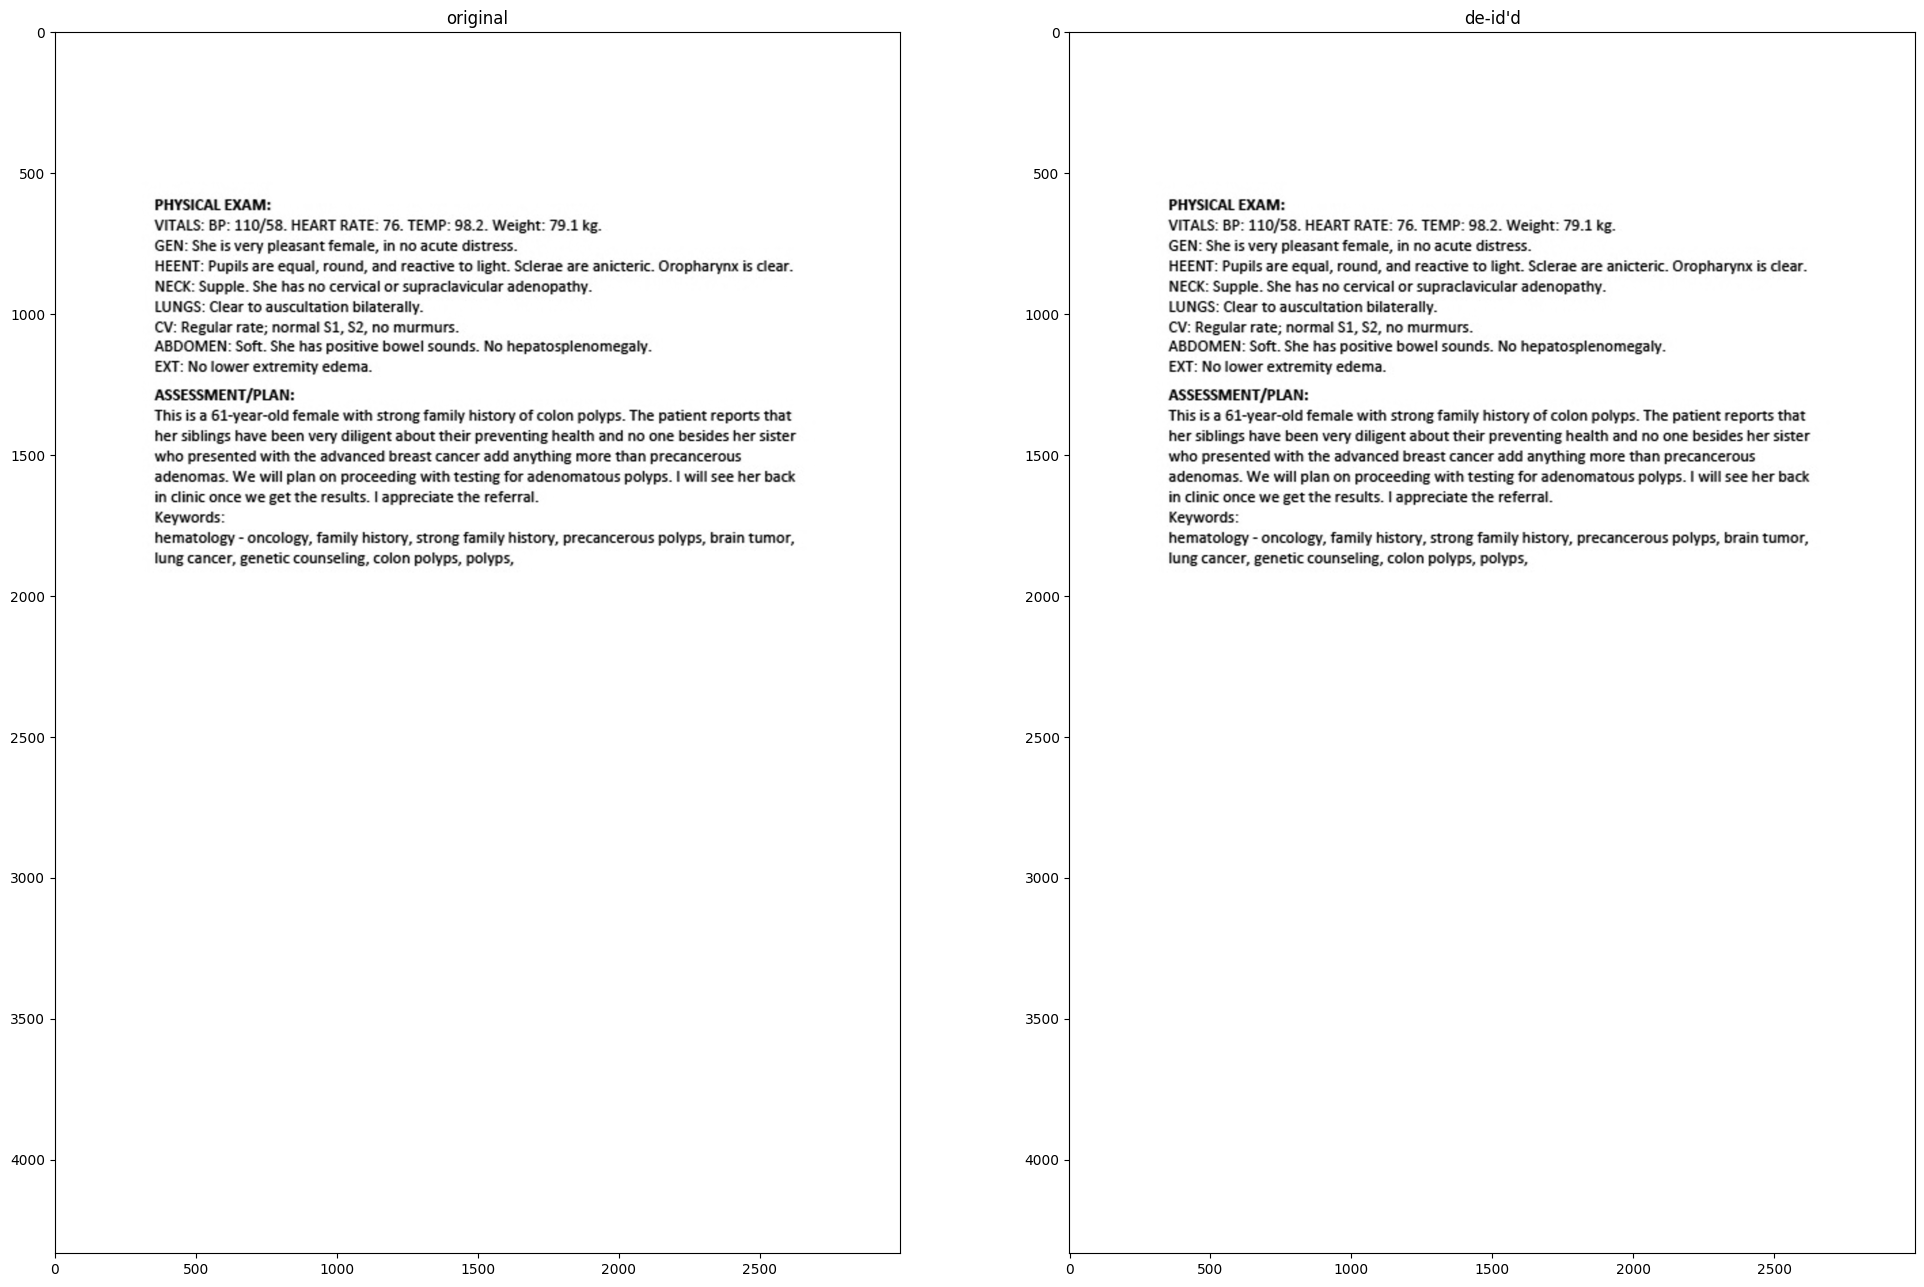

In [0]:
r = deid_results.select("image_raw", "image_with_regions").collect()[0]
img_orig = r.image_raw
img_deid = r.image_with_regions

img_pil_orig = visual.to_pil_image(img_orig, img_orig.mode)
img_pil_deid = visual.to_pil_image(img_deid, img_deid.mode)

plt.figure(figsize=(24,16))
plt.subplot(1, 2, 1)
plt.imshow(img_pil_orig, cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(img_pil_deid, cmap='gray')
plt.title("de-id'd")
plt.show()